In [1]:
import pandas as pd

In [2]:
bace_dataframe = pd.read_excel('bace_ki.xlsx')
bace_dataframe.shape

(515, 93)

In [147]:
# select needed features
bace_selected_features = bace_dataframe[['BindingDB Reactant_set_id', 'Ligand SMILES', 'BindingDB MonomerID', 'BindingDB Ligand Name', 'Target Name', 'Ki (nM)']]

# save features to csv
bace_selected_features.to_csv('bace_selected_features.csv', index=False)

bace_selected_features.shape


(515, 6)

In [158]:
# read saved bace selected features
bace_selected_features = pd.read_csv('bace_selected_features.csv')
bace_selected_features.shape

(515, 6)

In [159]:
# clean bace selected features to remove values with '>'

index_sum = []  # 54 ki values has > included

for index, row in bace_selected_features.iterrows():
    
    convert_ki_to_string = str(row['Ki (nM)'])
    if '>' in convert_ki_to_string:
        
        print(row['Ki (nM)'], index)
        
        index_sum.append(index)
        
print(len(index_sum))

>1000 49
>1000 50
>1000 51
>1000 52
>1000 53
>1000 54
>1000 55
>1000 56
>1000 57
>1000 58
>1000 59
>1000 60
>1000 61
>1000 62
>1000 63
>1000 64
>1000 65
>1000 66
>1000 67
>1000 68
>1000 69
>1000 70
>1000 71
>1000 72
>1800 80
>2000 82
>2000 83
>2000 84
>2000 85
>2000 86
>2000 87
>2000 88
>2000 89
>2000 90
>2400 91
>3000 94
>3000 95
>4000 96
>4000 97
>4000 98
>4000 99
>5000 102
>5000 103
>7000 106
>8000 107
>8000 108
>9000 109
>10000 110
>10000 111
>10000 112
>180 444
>242 455
>242 456
>242 459
54


In [160]:
  # drop entire row of the bace_selected_features dataframe
bace_selected_features.drop(bace_selected_features.index[index_sum], inplace=True)

bace_selected_features.shape

(461, 6)

In [161]:
# save clean bace_selected_features
bace_selected_features.to_csv("clean_bace_selected_features.csv", index=False)

,BindingDB Reactant_set_id,BindingDB MonomerID
count,4.610000e+02,4.610000e+02
mean,4.901521e+07,4.836289e+07
std,9.517455e+06,9.722589e+06
min,3.482170e+05,1.774700e+04
25%,5.037826e+07,5.012279e+07
50%,5.116324e+07,5.039821e+07
75%,5.118026e+07,5.048388e+07
max,5.129724e+07,5.052876e+07


In [162]:
# read clean_bace_selected_features
import pandas as pd
clean_bace_selected_features = pd.read_csv("clean_bace_selected_features.csv")
clean_bace_selected_features.shape


(461, 6)

In [186]:
# save clean bace ki only (unscaled)
bace_ki = clean_bace_selected_features['Ki (nM)']
bace_ki.to_csv('base_ki_only(unscaled).csv', index=False)
pd.to_numeric(bace_ki).describe()

count      461.000000
mean       260.042273
std       1457.004692
min          0.110000
25%          5.300000
50%         20.000000
75%        111.000000
max      20893.000000
Name: Ki (nM), dtype: float64

In [1]:
# test for gaussian distribution of unscaled ki using  Shapiro-Wilk test
from scipy.stats import shapiro
import pandas as pd

bace_ki = pd.read_csv('base_ki_only(unscaled).csv')

stat, p = shapiro(bace_ki)
print(stat, p)

if p > 0.05:
    print(f'{ki} is likely Gaussian (p={p:.3f})')
else:
    print(f'{ki} is not likely Gaussian (p={p:.3f})')
        

0.14029014110565186 3.1125641489582837e-41


NameError: name 'ki' is not defined

In [189]:
bace_ki.describe()

,Ki (nM)
count,461.000000
mean,260.042273
std,1457.004692
min,0.110000
25%,5.300000
50%,20.000000
75%,111.000000
max,20893.000000


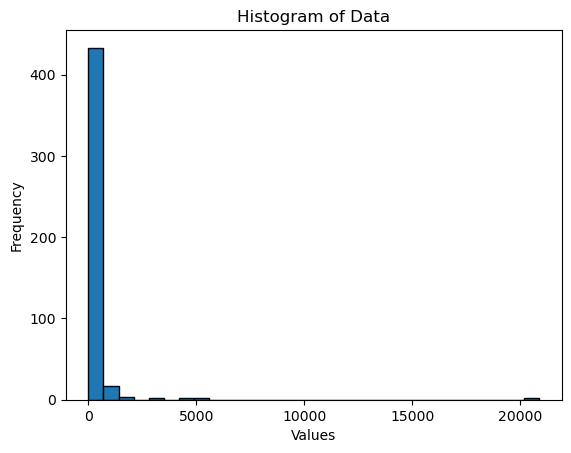

In [190]:
# visualizing bace_ki using histogram
import numpy as np
import matplotlib.pyplot as plt

# # Generate example data from a normal distribution
# np.random.seed(0)
# data = np.random.normal(loc=0, scale=1, size=1000)

# Plotting the histogram
plt.hist(bace_ki, bins=30, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

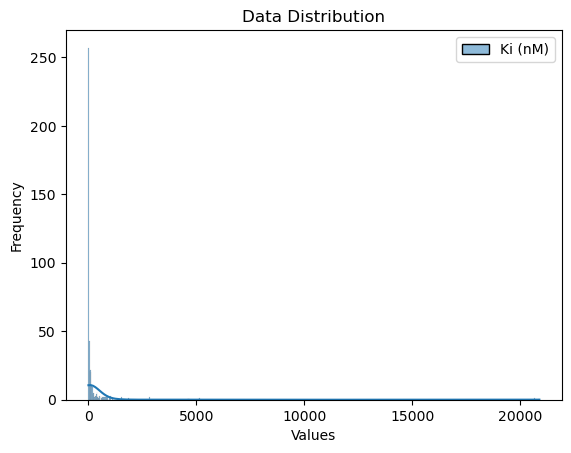

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(bace_ki, kde=True)
plt.title("Data Distribution")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()



C:\Users\adewa\AppData\Local\Temp\ipykernel_25552\1670559871.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(bace_ki, shade=True)


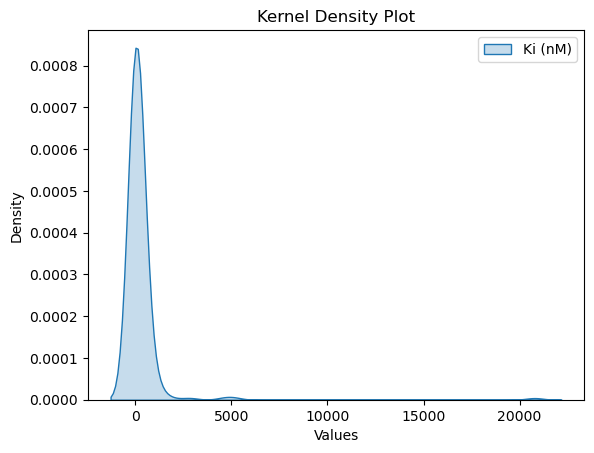

In [195]:
# Kernel Density Plot
sns.kdeplot(bace_ki, shade=True)
plt.title("Kernel Density Plot")
plt.xlabel("Values")
plt.ylabel("Density")
plt.show()




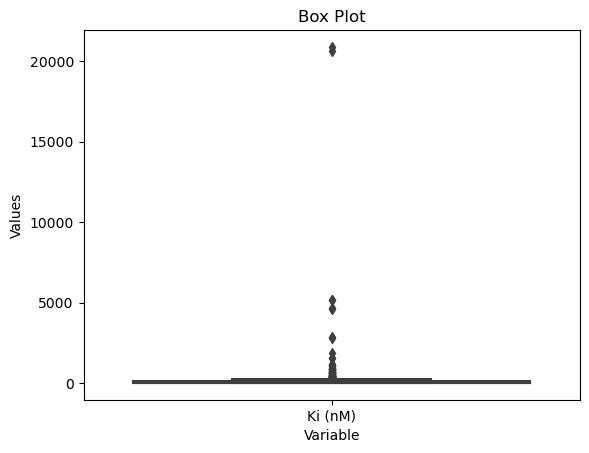

In [196]:
# Box Plot
sns.boxplot(bace_ki)
plt.title("Box Plot")
plt.xlabel("Variable")
plt.ylabel("Values")
plt.show()




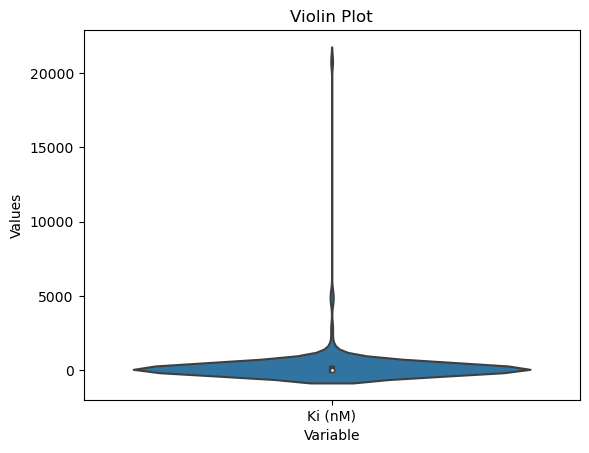

In [197]:
# Violin Plot
sns.violinplot(bace_ki)
plt.title("Violin Plot")
plt.xlabel("Variable")
plt.ylabel("Values")
plt.show()



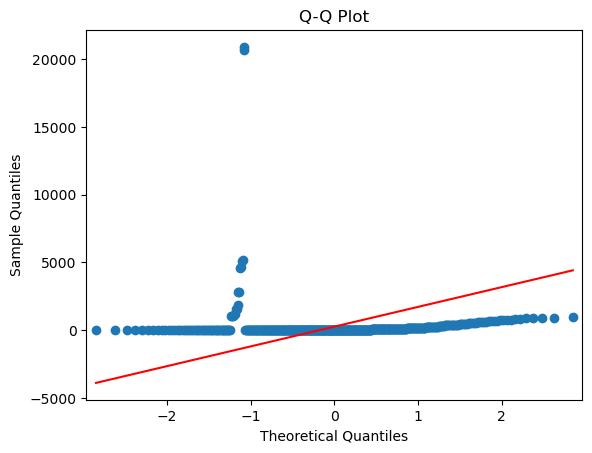

In [198]:
# QQ Plot
import statsmodels.api as sm
sm.qqplot(bace_ki, line='s')
plt.title("Q-Q Plot")
plt.show()